# **ANKIT BIND**

**I have used four models in this project.**


1.   **DecisionTreeClassifier**
2.  **RandomForestClassifier**
3. **KNeighborsClassifier**
4.  **LogisticRegression**
5. **Bayes Classifier**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier # Accuracy 100%
from sklearn.ensemble import RandomForestClassifier # Accuracy 100%
from sklearn.neighbors import KNeighborsClassifier # Accuracy 100%
from sklearn.linear_model import LogisticRegression # Accuracy 100%
from sklearn.naive_bayes import MultinomialNB # Accuracy 100%
from sklearn.naive_bayes import BernoulliNB # Accuracy 100%
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
data = pd.read_csv('/content/sample_data/heart_data.csv')
data.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [5]:
# Dimensions of the Dataset
data.shape

(297, 14)

In [6]:
data.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

In [7]:
data.describe()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,131.693603,2.158249,0.835017,54.542088,0.144781,149.599327,0.326599,0.676768,0.602694,247.350168,1.055556,0.996633,0.676768,0.461279
std,17.762806,0.964859,0.956690,9.049736,0.352474,22.941562,0.469761,0.468500,0.618187,51.997583,1.166123,0.994914,0.938965,0.499340
min,94.000000,0.000000,0.000000,29.000000,0.000000,71.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,2.000000,0.000000,48.000000,0.000000,133.000000,0.000000,0.000000,0.000000,211.000000,0.000000,0.000000,0.000000,0.000000
50%,130.000000,2.000000,0.000000,56.000000,0.000000,153.000000,0.000000,1.000000,1.000000,243.000000,0.800000,1.000000,0.000000,0.000000
75%,140.000000,3.000000,2.000000,61.000000,0.000000,166.000000,1.000000,1.000000,1.000000,276.000000,1.600000,2.000000,1.000000,1.000000
max,200.000000,3.000000,2.000000,77.000000,1.000000,202.000000,1.000000,1.000000,2.000000,564.000000,6.200000,2.000000,3.000000,1.000000


# **1. Decision Tree Classifier**

In [9]:
# Slicing data
# declare feature vector and target variable
x1 = data.drop(['st_depression'], axis=1)
y1 = data['num_vessels']
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state= 40)

In [10]:
# Instantiate the DecisionTreeClassifier model
dtc = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42)
dtc.fit(x1_train,y1_train)
#Predict the response for test dataset
y1_pred = dtc.predict(x1_test)
# Predict the response for training dataset
y1_train_predict = dtc.predict(x1_train)
y1_test_predict = dtc.predict(x1_test)
dtc

DecisionTreeClassifier(max_depth=7, random_state=42)

In [11]:
#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

# Train accuracy
y_train_predict = dtc.predict(x1_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y1_train,y1_train_predict)*100))

# Test accuracy
y_test_predict = dtc.predict(x1_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y1_test,y1_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


In [12]:
print('Precision, Recall and f1-score : \n',classification_report(y1_test,y1_pred))
print('Confusion Matrix : \n',confusion_matrix(y1_test,y1_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix : 
 [[36  0  0  0]
 [ 0 14  0  0]
 [ 0  0  6  0]
 [ 0  0  0  4]]


# **Pruning of our decision tree**

In [13]:
path = dtc.cost_complexity_pruning_path(x1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# **Visualizing alpha w.r.t impurity of leaves**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

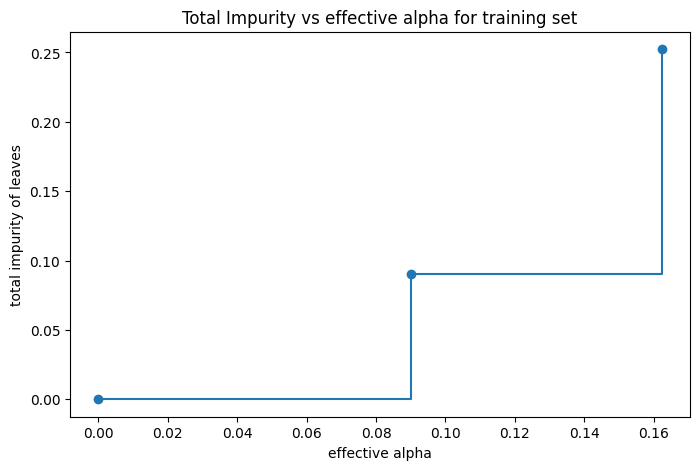

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42, ccp_alpha=ccp_alpha)
  clf.fit(x1_train, y1_train)
  clfs.append(clf)
  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 7 with ccp_alpha: 0.33954456707220687
Number of nodes in the last tree is: 5 with ccp_alpha: 0.33954456707220687
Number of nodes in the last tree is: 3 with ccp_alpha: 0.33954456707220687
Number of nodes in the last tree is: 1 with ccp_alpha: 0.33954456707220687


In [16]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42,ccp_alpha=0.016)
clf.fit(x1_train,y1_train)

DecisionTreeClassifier(ccp_alpha=0.016, max_depth=7, random_state=42)

In [17]:
pred=clf.predict(x1_test)
print('Accuracy of test dataset : ',accuracy_score(y1_test, pred))
pred_1 = clf.predict(x1_train)
print('Accuracy of train dataset : ',accuracy_score(y1_train,pred_1))

Accuracy of test dataset :  1.0
Accuracy of train dataset :  1.0


# **2. Random Forest Classifier**

In [40]:
# Slicing data
X = data.drop(['exercise_angina','rest_ecg'], axis=1)
y = data['gender']

In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(f"Shape train features :{X_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{X_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(237, 12)
Shape train labels :(237,)
Shape test features :(60, 12)
Shape test labels :(60,)


In [42]:
# Instantiate the RandomForestClassifier model
rfc = RandomForestClassifier(criterion='gini',random_state=45,n_estimators=50,max_depth=7)
rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)

In [43]:
#Let check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = rfc.predict(X_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = rfc.predict(X_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


In [104]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

gender           0.701659
thalassemia      0.060634
cholesterol      0.049163
st_depression    0.044757
diagnosis        0.034239
max_hr           0.029066
rest_bp          0.026995
age              0.025744
num_vessels      0.010283
chest_pain       0.007703
fasting_bs       0.005470
st_slope         0.004288
dtype: float64

# **3. KNN**

In [130]:
# Slicing data
X2 = data.drop(['chest_pain','st_slope'], axis=1)
y2 = data['fasting_bs']

In [141]:
# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)

# Initialize the KNeighborsClassifier with the specified parameters
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski', n_jobs=-1, n_neighbors=1, p=2, weights='uniform')

# Fit the classifier to the training data
knn.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=1)

In [142]:
pred2 = knn.predict(X2_test)
print(pred2)

[0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [143]:
print('Confusion Matrix \n', confusion_matrix(y2_test,pred2))
print('Classification Report \n',classification_report(y2_test,pred2))
print('Accuracy : ',accuracy_score(y2_test, pred2)*100,'%')

Confusion Matrix 
 [[46  8]
 [ 6  0]]
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.00      0.00      0.00         6

    accuracy                           0.77        60
   macro avg       0.44      0.43      0.43        60
weighted avg       0.80      0.77      0.78        60

Accuracy :  76.66666666666667 %


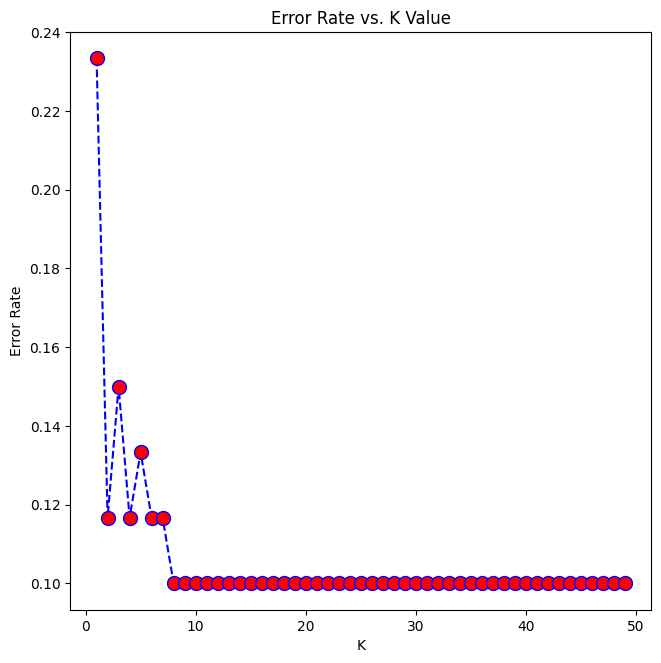

In [144]:
# Will take some time
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    error_rate.append(np.mean(pred_i != y2_test))

# Plot the error rate vs. K value
plt.figure(figsize=(7.5,7.5))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [145]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X2_train,y2_train)
pred = knn.predict(X2_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y2_test,pred2))
print('\n')
print(classification_report(y2_test,pred2))
print('Accuracy : ',accuracy_score(y2_test, pred2)*100,'%')

WITH K=1


[[46  8]
 [ 6  0]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.00      0.00      0.00         6

    accuracy                           0.77        60
   macro avg       0.44      0.43      0.43        60
weighted avg       0.80      0.77      0.78        60

Accuracy :  76.66666666666667 %


# **4. Logistic Regression**

In [151]:
# Slicing data
X3 = data.drop(['exercise_angina','rest_ecg'], axis=1)
y3 = data['gender']

In [152]:
# Create a new target variable with 3 categories
y3_cat = pd.cut(y3, 3, labels=["Low", "Medium", "High"])

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3_cat, test_size=0.2, random_state=42)

# Create a LogisticRegression model
logr = LogisticRegression()

# Fit the model to the training data
logr.fit(X3_train, y3_train)

LogisticRegression()

In [153]:
# Prediction result
y3_pred_test = logr.predict(X3_test)

In [154]:
print('Confusion Matrix \n', confusion_matrix(y3_test, y3_pred_test))
print('Classification Report \n',classification_report(y3_test, y3_pred_test))
print('Accuracy : ',accuracy_score(y3_test, y3_pred_test)*100,'%')

Confusion Matrix 
 [[45  0]
 [ 0 15]]
Classification Report 
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        45
         Low       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy :  100.0 %


# **5. Bayes Classifier**

In [155]:
# Slicing data
X4 = data.drop(['exercise_angina','rest_ecg'], axis=1)
y4 = data['gender']

In [156]:
#Split the data into training and test sets.
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=7)

In [157]:
# Training the Naive Bayes model on the Training set
classifier = BernoulliNB()
classifier.fit(X4_train, y4_train)

BernoulliNB()

In [158]:
# Predicting the Test set results
y4_pred = classifier.predict(X4_test)
print("Predicted Test Results : \n",y4_pred)

Predicted Test Results : 
 [1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1]


In [159]:
print('Precision, Recall and f1-score : \n',classification_report(y4_test,y4_pred))
print('Confusion Matrix : \n',confusion_matrix(y4_test,y4_pred))
print('Accuracy : ',accuracy_score(y4_test, y4_pred)*100,'%')

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        52

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

Confusion Matrix : 
 [[38  0]
 [ 0 52]]
Accuracy :  100.0 %
